# Q1 在taobao_data中，按照位置，对成交量进行汇总，并通过可视化展示出来（柱状图）

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import os
import seaborn as sns

In [2]:
df = pd.read_csv('taobao_data.csv')
df.head()

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


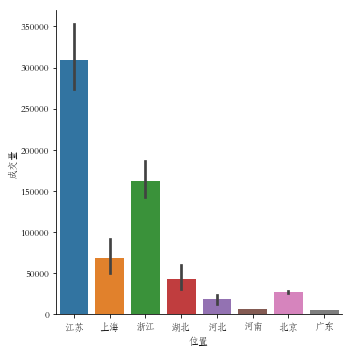

In [11]:
sns.catplot(x='位置', y='成交量', data=df, estimator=sum, kind='bar')

# Q2 在taobao_data中,绘制成交量和价格的关系图


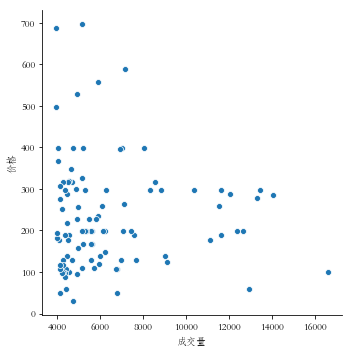

In [12]:
sns.relplot(x='成交量', y='价格', data=df)

# Q3 在film数据中，通过数据可视化展示，那个国家的电影最流行，那个类型最受欢迎，评价人数最多的前10部电影,以及评分最高的10部电影



In [13]:
df = pd.read_excel('film.xlsx')
df.head()

,name,actor,year,info,score,pingjia,country,type,people
0,肖申克的救赎,弗兰克·德拉邦特 Frank Darabont 主演: 蒂姆·罗宾斯 Tim Robbi...,1994,/ 美国 / 犯罪,9.6,1362391人评价,美国,犯罪,1362391
1,霸王别姬,陈凯歌 Kaige Chen 主演: 张国荣 Leslie Cheung / 张丰毅 F...,1993,/ 中国大陆 香港 / 剧情 爱情,9.6,1007088人评价,中国大陆 香港,剧情 爱情,1007088
2,这个杀手不太冷,吕克·贝松 Luc Besson 主演: 让·雷诺 Jean Reno / 娜塔莉·波特...,1994,/ 法国 / 剧情 动作,9.4,1245633人评价,法国,剧情 动作,1245633
3,阿甘正传,罗伯特·泽米吉斯 Robert Zemeckis 主演: 汤姆·汉克斯 Tom Hank...,1994,/ 美国 / 剧情,9.4,1073282人评价,美国,剧情,1073282
4,美丽人生,罗伯托·贝尼尼 Roberto Benigni 主演: 罗伯托·贝尼尼 Roberto ...,1997,/ 意大利 / 剧情 喜剧 爱情,9.5,627667人评价,意大利,剧情 喜剧 爱情,627667


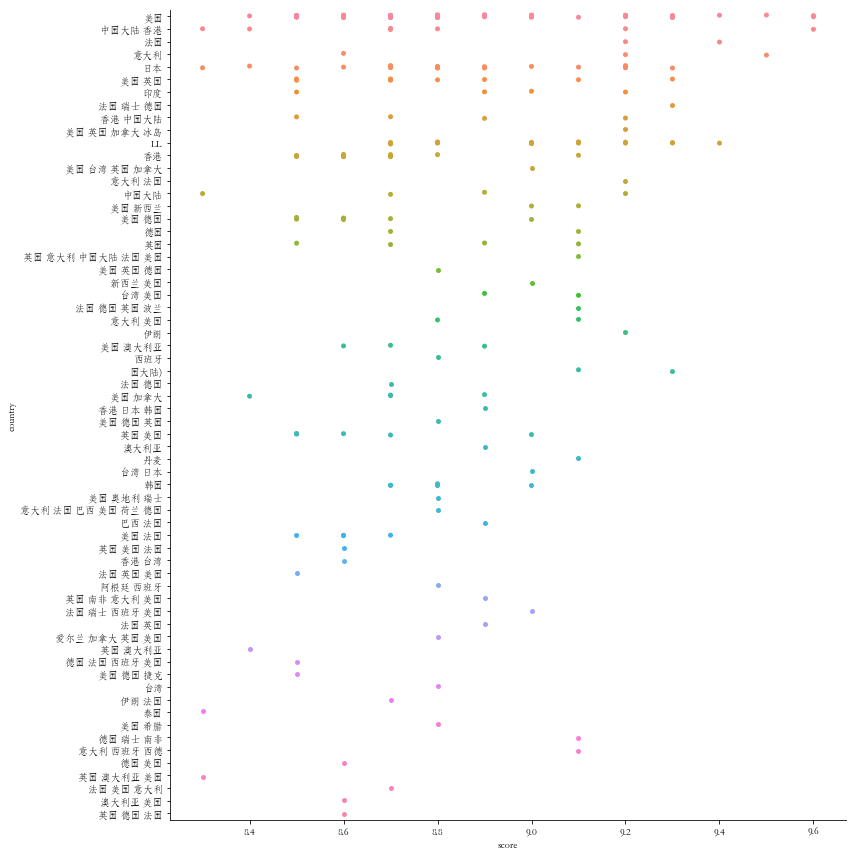

In [18]:
sns.catplot(x='score', y='country', data=df, height=12)

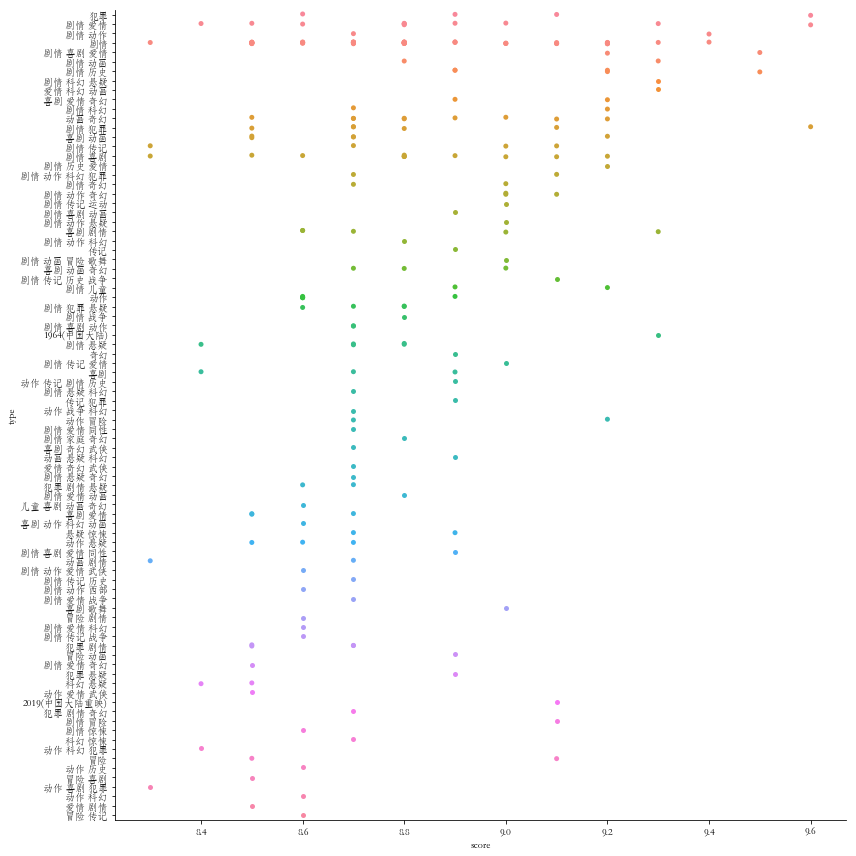

In [19]:
sns.catplot(x='score', y='type', data=df, height=12)

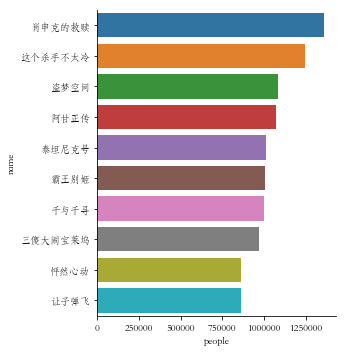

In [28]:
g = sns.catplot(x='people', y='name', data=df.sort_values('people', ascending=False).iloc[:10], kind='bar')
g.set_titles('评价人数最多的前10部电影')

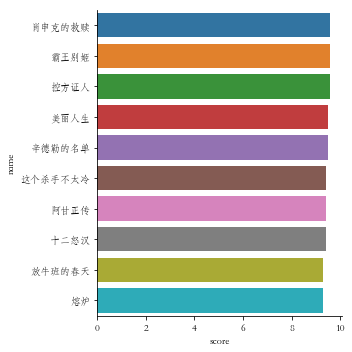

In [29]:
g = sns.catplot(x='score', y='name', data=df.sort_values('score', ascending=False).iloc[:10], kind='bar')
g.set_titles('评分最高的前10部电影')

# Q4 在house_info里面，查看一下，精装和毛坯的比例，饼图展示, 楼盘朝向的占比，house_type的占比，单价和总价的分布图

In [30]:
df = pd.read_excel('house_info.xlsx')
df.head()

,zone,house_type,area,location,others,lift,total_price,unit_price,单价
0,雅居乐十里花巷,3室2厅,100平米,东,毛坯,有电梯,100.0,10000元/平米,10000
1,置信巴厘岛A区,3室2厅,87.12平米,东,精装,有电梯,168.0,19284元/平米,19284
2,双水康城A区,2室1厅,72.46平米,西,简装,无电梯,76.0,10489元/平米,10489
3,中粮锦云,3室2厅,73.88平米,西北,精装,有电梯,175.0,23688元/平米,23688
4,红树湾,2室1厅,87.28平米,南,简装,有电梯,136.0,15583元/平米,15583


In [33]:
from pyecharts import options as opts
from pyecharts.charts import Page, Pie


def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(df['others'].value_counts().index, df['others'].value_counts().to_list())])
        .set_global_opts(title_opts=opts.TitleOpts(title="精装和毛坯的比例"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c
pie_base().render_notebook()

In [35]:
def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(df['location'].value_counts().index, df['location'].value_counts().to_list())])
        .set_global_opts(title_opts=opts.TitleOpts(title="楼盘朝向的占比"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c
pie_base().render_notebook()

In [36]:
def pie_base() -> Pie:
    c = (
        Pie()
        .add("", [list(z) for z in zip(df['house_type'].value_counts().index, df['house_type'].value_counts().to_list())])
        .set_global_opts(title_opts=opts.TitleOpts(title="house_type的占比"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c
pie_base().render_notebook()

In [38]:
from pyecharts import options as opts
from pyecharts.charts import Scatter
def scatter_base() -> Scatter:
    c = (
        Scatter()
        .add_xaxis(df['单价'])
        .add_yaxis("总价", df['total_price'])
        .set_global_opts(title_opts=opts.TitleOpts(title="Scatter-基本示例"))
    )
    return c
scatter_base().render_notebook()